# cuML Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

## Imports

In [1]:
import cudf
import cuml
import numpy as np
import cupy as cp

---

# Creating datasets

---

#### datasets.make_blobs()

<AxesSubplot:xlabel='feat_0', ylabel='feat_1'>

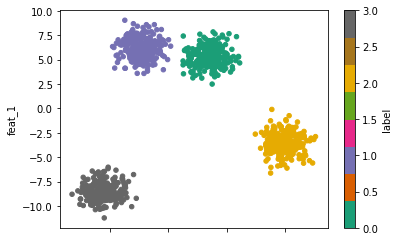

In [2]:
X, y = cuml.make_blobs(n_samples=1000, centers=4, n_features=2, random_state=np.random.randint(1e9))

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(2)])
df['label'] = cudf.Series(y)
df.head()

df.to_pandas().plot(kind='scatter', x='feat_0', y='feat_1', c='label', colormap='Dark2')

<AxesSubplot:xlabel='feat_0', ylabel='feat_1'>

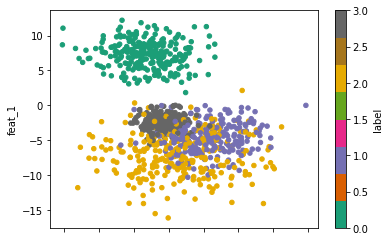

In [3]:
X, y = cuml.make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=[2, 2, 3, 1], random_state=np.random.randint(1e9))

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(2)])
df['label'] = cudf.Series(y)
df.head()

df.to_pandas().plot(kind='scatter', x='feat_0', y='feat_1', c='label', colormap='Dark2')

#### datasets.make_clasification()

In [4]:
X, y = cuml.make_classification(
    n_samples=1000
    , n_classes=2
    , n_features=4
    , n_informative=2
    , random_state=np.random.randint(1e9)
)

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(4)])
df['label'] = cudf.Series(y)
df.head()

,feat_0,feat_1,feat_2,feat_3,label
0,-0.330068,-1.446386,0.194161,-0.757086,0
1,1.472476,-1.299830,0.125506,-0.526262,0
2,0.158879,2.007596,-0.584717,1.179676,1
3,-0.575587,2.852680,-1.068796,2.191961,1
4,1.046782,0.335309,0.496608,-0.377501,1


In [5]:
X, y = cuml.make_classification(
    n_samples=1000
    , n_classes=2
    , n_features=4
    , n_informative=2
    , flip_y=0.05
    , shift=cp.array([2.3, -0.7, -0.4, 0.3])
    , scale=cp.array([1.2, -1.1,  0.3, 3.2])
    , random_state=np.random.randint(1e9)
)

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(4)])
df['label'] = cudf.Series(y)
df.head(10).to_pandas().to_records()

rec.array([(0, 5.126337 ,  0.33675027,  0.06317207,  1.3372872 , 1),
           (1, 3.5775652,  0.68610734, -0.16319786,  0.32753986, 1),
           (2, 2.98198  ,  3.4276183 , -0.24468835, -0.22852702, 0),
           (3, 2.4230435,  0.6063739 ,  0.02159047,  1.0566452 , 1),
           (4, 3.451919 ,  1.161457  , -0.20550369,  0.96791375, 0),
           (5, 3.9053993,  0.72737557, -0.14375395,  1.400276  , 0),
           (6, 4.896702 ,  2.0357177 ,  0.02205826,  1.415358  , 0),
           (7, 1.6905706, -0.60476595, -0.104266  ,  1.1462047 , 1),
           (8, 3.9576783,  4.296168  , -0.08721144, -0.0409593 , 0),
           (9, 2.933596 ,  3.3763092 , -0.25261003, -0.23443389, 0)],
          dtype=[('index', '<i8'), ('feat_0', '<f4'), ('feat_1', '<f4'), ('feat_2', '<f4'), ('feat_3', '<f4'), ('label', '<i8')])

#### datasets.make_regression()

In [6]:
X, y = cuml.make_regression(
    n_samples=1000
    , n_targets=2
    , n_features=4
    , n_informative=2
    , random_state=np.random.randint(1e9)
)

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(4)])
df['target'] = cudf.Series(y)
df.head()

,feat_0,feat_1,feat_2,feat_3,target
0,1.442512,-0.017995,-0.181278,0.601786,31.926664
1,1.790281,0.395719,-0.708600,-0.318938,38.084705
2,-1.053488,1.267235,-0.007966,-1.569981,-41.723366
3,1.666720,1.077751,0.147248,-0.921053,-33.736622
4,-1.700236,-1.518150,-0.671558,-0.383880,-98.115311


In [7]:
X, y, c = cuml.make_regression(
    n_samples=1000
    , n_targets=2
    , n_features=4
    , n_informative=2
    , bias=-3.4
    , noise=0.2
    , coef=True
    , random_state=np.random.randint(1e9)
)

print(f'coefficients:\n {cp.array(c)}')

df = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(4)])
df['target'] = cudf.Series(y)
df.head()

coefficients:
 [[ 0.        0.      ]
 [57.06537  88.379776]
 [12.153415 44.475708]
 [ 0.        0.      ]]


,feat_0,feat_1,feat_2,feat_3,target
0,-1.214201,0.028200,0.282466,1.382896,1.716403
1,-0.803626,0.426636,0.046438,0.153225,11.379223
2,-2.244749,0.204294,-1.076452,1.790693,21.455624
3,0.367664,-0.091193,-0.494024,0.649579,35.963711
4,0.428866,0.068288,0.026521,0.588996,-4.917943


#### datasets.make_arima()

In [8]:
X = cuml.make_arima(
    batch_size=1000
    , n_obs=100
    , order=(2,1,2)
    , seasonal_order=(0,1,2,12)
    , random_state=np.random.randint(1e9)
)
X[0][0:10]

array([-0.56843149,  0.06552744, -0.01927045, -0.76416741, -0.95500004,
       -0.44188216,  0.5884112 ,  0.50182497,  0.539813  ,  0.49058531])

In [9]:
X = cuml.make_arima(
    batch_size=1000
    , n_obs=100
    , order=(2,1,2)
    , seasonal_order=(0,1,2,12)
    , output_type='cudf'
    , random_state=np.random.randint(1e9)
)
X

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.800054,0.054262,-0.624197,-0.280603,-0.014092,-0.401700,0.230799,0.950919,-0.932632,-0.737402,...,-0.593695,0.643734,0.281773,0.907837,0.714437,0.672437,0.027618,0.700973,0.675400,-0.931533
1,-0.861664,-0.269775,-1.046375,-0.521838,0.306585,0.094446,0.379332,1.027562,-0.920820,-0.857384,...,-0.457439,0.227181,0.439620,0.742734,0.888248,0.611425,-0.370609,0.291883,1.028895,-1.295261
2,-0.418570,-0.532279,-1.094268,-0.964380,0.591251,-0.133069,0.738296,1.505295,-1.117591,-0.569641,...,-0.478221,0.159929,0.145788,0.651754,1.118223,0.329007,-0.719542,-0.071888,1.232883,-1.058204
3,-0.644219,-0.118990,-0.879502,-0.549207,1.009139,-0.125412,0.892549,1.719403,-1.200580,-0.649252,...,-0.969675,0.028470,0.229894,0.254390,1.405322,0.803901,-0.975796,0.105381,1.692409,-0.984288
4,-0.249752,-0.007396,-0.664150,-0.517053,0.682031,-0.066869,0.836137,1.966255,-1.452377,-0.922475,...,-1.397516,0.190075,-0.210421,0.482332,1.751785,1.228047,-0.691425,0.369437,1.428145,-1.076719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-7.259940,-15.692312,-4.930493,-12.345592,10.807125,8.662235,-15.254170,18.266388,3.590726,-18.063633,...,-5.372371,4.642579,6.740101,1.104289,36.036493,14.664358,-12.315857,-2.204735,0.202442,-2.863508
96,-7.834847,-15.618357,-4.838778,-12.273684,11.167026,8.820401,-15.643577,19.388063,3.061265,-18.367340,...,-5.905030,6.619766,5.923176,0.179035,35.154968,13.756319,-12.960312,-3.334341,0.674112,-2.722166
97,-8.233171,-16.462737,-5.022088,-12.483815,12.383743,8.980817,-15.500431,19.595623,1.272029,-18.635104,...,-5.867515,6.886137,6.415773,0.297035,34.758740,13.909664,-15.643640,-3.550963,1.332317,-2.995676
98,-7.708245,-16.880895,-4.370441,-13.210628,13.028116,8.763195,-15.661834,20.884803,2.552725,-18.398518,...,-5.823237,6.555690,5.238375,-0.286657,35.086376,14.256837,-15.461400,-3.348584,1.672684,-3.538980
